# Benchmark analysis

**Note**: a local instance of the server needs to run for the execution of the benchmarks script.

Run the cell below to perform a round of benchmarks.

In [ ]:
SIMULATED_CLIENT_COUNT = 5
ANALYTICS_FILE = 'out.csv'
ANALYTICS_FOLDER = 'analytics'

from os import path
!yarn benchmark {SIMULATED_CLIENT_COUNT} {path.join(ANALYTICS_FOLDER, ANALYTICS_FILE)}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={'figure.figsize': (16, 8)})

In [3]:
ANALYTICS_FILE = 'out.csv'

df = pd.read_csv(ANALYTICS_FILE)
df.set_index('t', inplace=True)

diffs = df.index[1:] - df.index[:len(df.index)-1]
diffs = pd.concat([pd.Series([0]), pd.Series(diffs)])
df['diff'] = diffs.to_numpy()

df.describe()

,latency_min,latency_max,latency_avg,buffer_min,buffer_max,buffer_avg,diff
count,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.000000
mean,14512.873800,25158.740400,20013.797600,0.0,0.0,0.0,11219.516600
std,18304.171282,61398.423053,39116.162329,0.0,0.0,0.0,29450.308928
min,496.000000,1126.000000,848.000000,0.0,0.0,0.0,0.000000
25%,3036.250000,5602.750000,4392.750000,0.0,0.0,0.0,60.000000
50%,7412.000000,11677.500000,10130.000000,0.0,0.0,0.0,128.500000
75%,20820.250000,30877.750000,26309.750000,0.0,0.0,0.0,423.500000
max,194967.000000,972857.000000,587955.000000,0.0,0.0,0.0,891484.000000


### Pruning

We prune the dataset to only include the 75th percentile of certain dimensions.
This removes the largest outliers, which skews the whole graph.

The 75th percentiles were chosen as they still allow for a general trend to be seen, without seeing extremes.

In [4]:
percentile_75 = 424
df = df.loc[df['diff'] < percentile_75]

percentile_75 = 26310
df = df.loc[df['latency_avg'] < percentile_75]

percentile_75 = 50000
df = df.loc[df['latency_max'] < percentile_75]

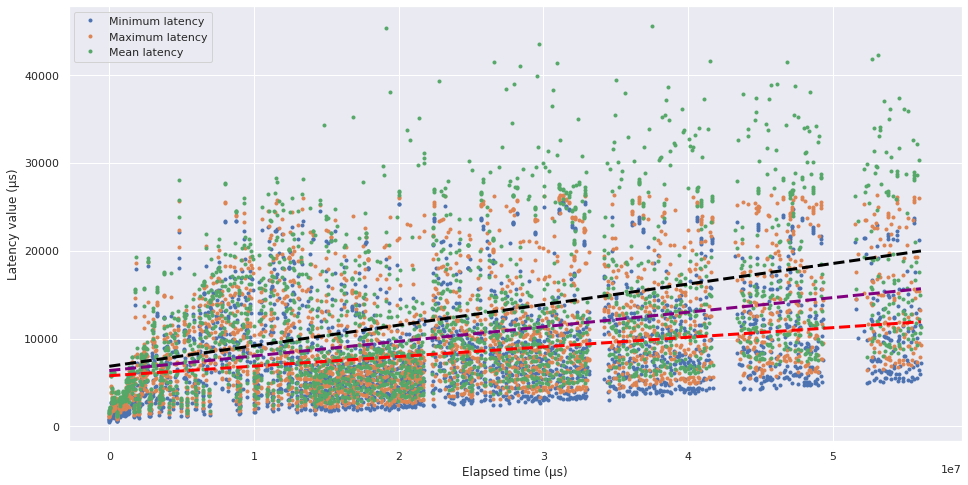

In [5]:
latency_columns = ['latency_min', 'latency_avg', 'latency_max']
latency_df = df[latency_columns]
latency_df.plot(
    linestyle='None',
    marker='.',
    xlabel='Elapsed time (μs)',
    ylabel='Latency value (μs)',
)
plt.legend([
    'Minimum latency',
    'Maximum latency',
    'Mean latency',
])

for column, color in zip(latency_columns, ['red', 'purple', 'black']):
    z = np.polyfit(df.index, df[column], 1)
    p = np.poly1d(z)
    plt.plot(
        df.index,
        p(df.index),
        color=color,
        linestyle='--',
        linewidth=3,
    )

plt.savefig(
    fname='latency.jpg',
    dpi=100,
)

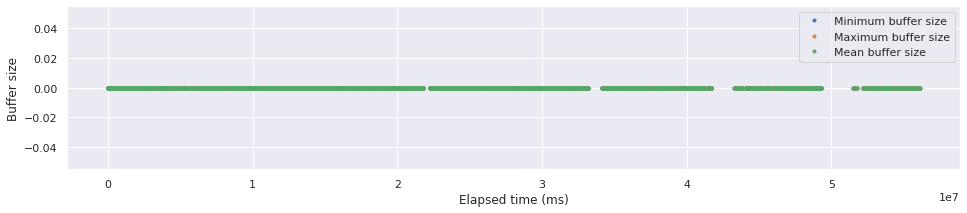

In [6]:
buffer_df = df[['buffer_min', 'buffer_max', 'buffer_avg']]
buffer_df.plot(
    figsize=(16, 3),
    linestyle='None',
    marker='.',
    xlabel='Elapsed time (ms)',
    ylabel='Buffer size',
)
plt.legend([
    'Minimum buffer size',
    'Maximum buffer size',
    'Mean buffer size',
])

plt.savefig(
    fname='buffer_size.jpg',
    dpi=100,
)